### **1. Objective (Goal of the Dataset)**  
The goal is to **develop a machine learning model** that can **predict the risk of heart disease** based on **health and lifestyle factors**.

- **Target Variable:**  
  - **Heart_Risk**:  
    - **1**: High risk of heart disease.  
    - **0**: Low or no risk of heart disease.  


###  **2. Dataset Features (Column Descriptions)**  

| **Column Name**         | **Description**                              | **Data Type**         |
|-------------------------|----------------------------------------------|-----------------------|
| **Heart_Risk**          | Heart disease risk (target variable).         | Binary (0 or 1)       |
| **Cold_Sweats_Nausea**  | Presence of cold sweats or nausea.            | Binary (0 or 1)       |
| **Pain_Arms_Jaw_Back**  | Pain in arms, jaw, or back.                   | Binary (0 or 1)       |
| **Swelling**            | Swelling in the body.                         | Binary (0 or 1)       |
| **Dizziness**           | Feeling of dizziness.                         | Binary (0 or 1)       |
| **Fatigue**             | Chronic fatigue.                              | Binary (0 or 1)       |
| **Shortness_of_Breath** | Difficulty in breathing.                      | Binary (0 or 1)       |
| **Chest_Pain**          | Presence of chest pain.                       | Binary (0 or 1)       |
| **Palpitations**        | Experience of heart palpitations.             | Binary (0 or 1)       |
| **Age**                 | Age of the individual.                        | Integer (Numerical)   |
| **Sedentary_Lifestyle** | Leading a sedentary (inactive) lifestyle.     | Binary (0 or 1)       |
| **Obesity**             | Whether the person is obese.                  | Binary (0 or 1)       |
| **Chronic_Stress**      | Experience of long-term stress.               | Binary (0 or 1)       |
| **Diabetes**            | Presence of diabetes.                         | Binary (0 or 1)       |
| **Family_History**      | Family history of heart disease.              | Binary (0 or 1)       |
| **Smoking**             | Whether the person is a smoker.               | Binary (0 or 1)       |
| **High_BP**             | High blood pressure (hypertension).           | Binary (0 or 1)       |
| **High_Cholesterol**    | High cholesterol levels.                      | Binary (0 or 1)       |
| **Gender**              | Gender (1 for male, 0 for female).            | Binary (0 or 1)       |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df=pd.read_csv("heart_disease_risk_dataset_corrupted.csv")
df

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0,0,0,1,0,0,0,0,NaN,0.0,0,1,0,1,0,0,0,48,0
1,0,1,0,1,0,0,0,0,2.0,0.0,0,1,1,0,0,0,0,46,0
2,1,0,0,1,0,0,0,0,1.0,1.0,0,1,1,1,0,0,1,66,0
3,1,1,0,1,0,0,1,1,1.0,NaN,1,1,0,1,1,1,1,0,1
4,0,0,1,0,1,0,0,0,NaN,0.0,1,0,0,0,0,0,0,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72095,1,1,1,1,1,1,1,1,0.0,1.0,0,1,1,0,0,0,1,48,1
72096,1,1,1,1,0,1,1,1,1.0,0.0,0,0,1,1,1,1,0,47,1
72097,1,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,25,0
72098,0,1,0,0,1,0,0,0,0.0,1.0,0,1,1,1,1,1,0,47,0


### handling duplicate rows

In [3]:
df.duplicated().sum()

5843

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66257 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           66257 non-null  int64  
 1   Shortness_of_Breath  66257 non-null  int64  
 2   Fatigue              66257 non-null  int64  
 3   Palpitations         66257 non-null  int64  
 4   Dizziness            66257 non-null  int64  
 5   Swelling             66257 non-null  int64  
 6   Pain_Arms_Jaw_Back   66257 non-null  int64  
 7   Cold_Sweats_Nausea   66257 non-null  int64  
 8   High_BP              56315 non-null  float64
 9   High_Cholesterol     56057 non-null  float64
 10  Diabetes             66257 non-null  int64  
 11  Smoking              66257 non-null  int64  
 12  Obesity              66257 non-null  int64  
 13  Sedentary_Lifestyle  66257 non-null  int64  
 14  Family_History       66257 non-null  int64  
 15  Chronic_Stress       66257 non-null  int6

### handling missing values

In [7]:
df.isnull().sum()

Chest_Pain                 0
Shortness_of_Breath        0
Fatigue                    0
Palpitations               0
Dizziness                  0
Swelling                   0
Pain_Arms_Jaw_Back         0
Cold_Sweats_Nausea         0
High_BP                 9942
High_Cholesterol       10200
Diabetes                   0
Smoking                    0
Obesity                    0
Sedentary_Lifestyle        0
Family_History             0
Chronic_Stress             0
Gender                     0
Age                     8110
Heart_Risk                 0
dtype: int64

Missing Values in Key Columns

| **Column**            | **Description**                                | **Data Type**           |
|-----------------------|-----------------------------------------------|-------------------------|
| `High_BP`             | Does the patient have **high blood pressure**? | **Binary (Yes/No)**     |
| `High_Cholesterol`    | Does the patient have **high cholesterol levels**? | **Binary (Yes/No)**     |
| `Age`                 | **Patient's age** (stored as `object` instead of numeric). | **Object (should be converted to numeric)** |




In [8]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


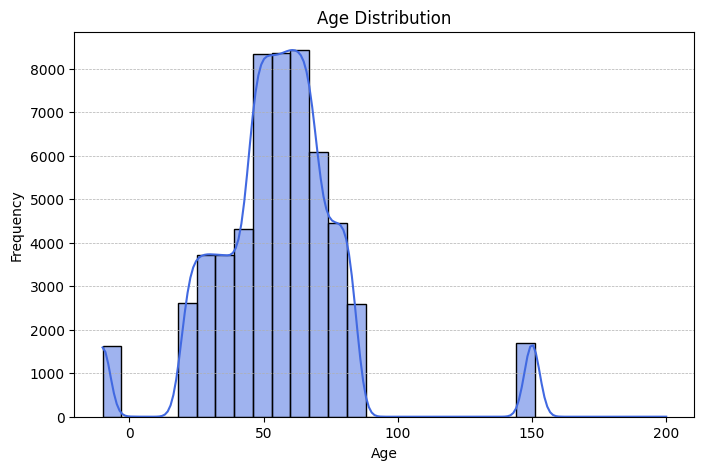

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [10]:
df['Age'].isnull().sum()

10315

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [12]:
df['Age'].isnull().sum()

0

In [13]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
2.0     2442
Name: count, dtype: int64

In [14]:
df = df[df['High_BP'] != 2.0]

In [15]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
Name: count, dtype: int64

In [16]:
imputer = KNNImputer(n_neighbors=15)
df.loc[:, 'High_BP'] = imputer.fit_transform(df[['High_BP']]).round().astype(int)

print(df['High_BP'].value_counts())



High_BP
0.0    37066
1.0    26749
Name: count, dtype: int64


In [17]:
df['High_Cholesterol'].value_counts()

High_Cholesterol
0.0    27199
1.0    26804
Name: count, dtype: int64

In [18]:
imputer = KNNImputer(n_neighbors=15)
df.loc[:, 'High_Cholesterol'] = imputer.fit_transform(df[['High_Cholesterol']]).round().astype(int)

print(df['High_Cholesterol'].value_counts())

High_Cholesterol
0.0    37011
1.0    26804
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63815 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           63815 non-null  int64  
 1   Shortness_of_Breath  63815 non-null  int64  
 2   Fatigue              63815 non-null  int64  
 3   Palpitations         63815 non-null  int64  
 4   Dizziness            63815 non-null  int64  
 5   Swelling             63815 non-null  int64  
 6   Pain_Arms_Jaw_Back   63815 non-null  int64  
 7   Cold_Sweats_Nausea   63815 non-null  int64  
 8   High_BP              63815 non-null  float64
 9   High_Cholesterol     63815 non-null  float64
 10  Diabetes             63815 non-null  int64  
 11  Smoking              63815 non-null  int64  
 12  Obesity              63815 non-null  int64  
 13  Sedentary_Lifestyle  63815 non-null  int64  
 14  Family_History       63815 non-null  int64  
 15  Chronic_Stress       63815 non-null  int6

### Outlier Detection

In [20]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000
mean,0.496576,0.498143,0.496639,0.496545,0.499350,0.496733,0.499412,0.500243,0.419165,0.420027,0.500259,3.503628,0.497767,0.502217,0.496247,0.498942,0.547708,55.473290,0.497281
std,0.499992,0.500000,0.499993,0.499992,0.500003,0.499993,0.500004,0.500004,0.493426,0.493567,0.500004,16.610879,0.499999,0.499999,0.499990,0.500003,0.497723,23.443079,0.499997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Chest_Pain'),
  Text(1, 0, 'Shortness_of_Breath'),
  Text(2, 0, 'Fatigue'),
  Text(3, 0, 'Palpitations'),
  Text(4, 0, 'Dizziness'),
  Text(5, 0, 'Swelling'),
  Text(6, 0, 'Pain_Arms_Jaw_Back'),
  Text(7, 0, 'Cold_Sweats_Nausea'),
  Text(8, 0, 'High_BP'),
  Text(9, 0, 'High_Cholesterol'),
  Text(10, 0, 'Diabetes'),
  Text(11, 0, 'Smoking'),
  Text(12, 0, 'Obesity'),
  Text(13, 0, 'Sedentary_Lifestyle'),
  Text(14, 0, 'Family_History'),
  Text(15, 0, 'Chronic_Stress'),
  Text(16, 0, 'Gender'),
  Text(17, 0, 'Age'),
  Text(18, 0, 'Heart_Risk')])

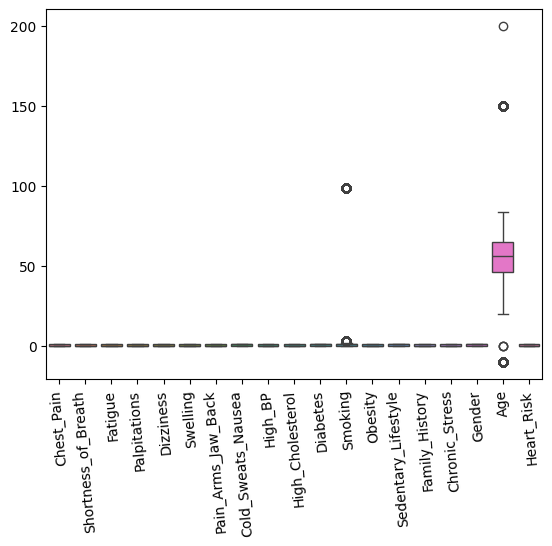

In [21]:
sns.boxplot(df)
plt.xticks(rotation=95)

### handling the outliers

  **Outliers in the Data:**

1. AgeColumn:
   - There are negative values (-10), which are not logical.  
   - The maximum value (200) is unusually high and outside the typical human age range.

2. Smoking Column:
   - The maximum value (99) is abnormal since other columns are binary (0 or 1).

<Axes: xlabel='Age'>

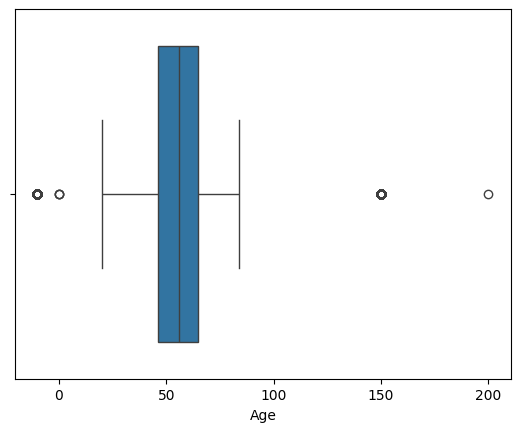

In [22]:
sns.boxplot(x=df['Age'])


In [23]:
(df['Age'] >= 18) & (df['Age'] <= 120)

0         True
2         True
3        False
4         True
5         True
         ...  
72064     True
72083     True
72084     True
72093     True
72099     True
Name: Age, Length: 63815, dtype: bool

In [24]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 120)]
print(df['Age'].describe())


count    60598.000000
mean        54.638734
std         15.004951
min         20.000000
25%         47.000000
50%         56.000000
75%         64.000000
max         84.000000
Name: Age, dtype: float64


In [25]:
print(df['Smoking'].value_counts())


Smoking
0     27708
1     27615
3      1801
99     1780
2      1694
Name: count, dtype: int64


In [26]:
most_frequent_value = df['Smoking'].mode()[0]
df['Smoking'] = df['Smoking'].apply(lambda x: most_frequent_value if x not in [0, 1] else x)

In [27]:
print(df['Smoking'].value_counts())

Smoking
0    32983
1    27615
Name: count, dtype: int64


In [28]:
df['Smoking'].describe()

count    60598.000000
mean         0.455708
std          0.498038
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Smoking, dtype: float64

### Exploratory Data Analysis

` Attribute Classification: `

**A. Numerical Attribute:**  
- Age (Continuous)  

**B. Categorical Attribute:**  
- Gender (Nominal)  

**C. Binary Attributes (0: No, 1: Yes):**  
- Chest_Pain
- Shortness_of_Breath 
- Fatigue 
- Palpitations
- Dizziness
- Swelling  
- Pain_Arms_Jaw_Back
- Cold_Sweats_Nausea
- High_BP
- High_Cholesterol
- Smoking
- Obesity
- Sedentary_Lifestyle
- Family_History
- Chronic_Stress 

**D. Target Variable:**  
- Heart_Risk

In [29]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000
mean,0.496832,0.498152,0.496601,0.496271,0.500000,0.496683,0.499307,0.500231,0.418826,0.419898,0.500627,0.455708,0.498102,0.502904,0.496518,0.499109,0.548021,54.638734,0.497475
std,0.499994,0.500001,0.499993,0.499990,0.500004,0.499993,0.500004,0.500004,0.493371,0.493546,0.500004,0.498038,0.500001,0.499996,0.499992,0.500003,0.497693,15.004951,0.499998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


`Dataset Summary `
- Total Records: 60,598 samples.  
- Balanced Data: Most features are evenly split (0 or 1).  

Age
- Mean Age: 54.6 years (Range: 20–84).  
Insight: Focuses on middle-aged and older adults.  

Gender
- Male: 54%, Female: 46%.  
Insight: Slight male dominance.  

Binary Features 
- Most symptoms and conditions are evenly distributed.  
Insight: Balanced representation of medical conditions.  

Heart Risk
- Mean: 0.497 (Balanced target).  
Insight: Ideal for unbiased model training.

`Checking Balanced or Imbalanced Dataset`

Text(0.5, 1.02, 'Count of TARGET Variable per category')

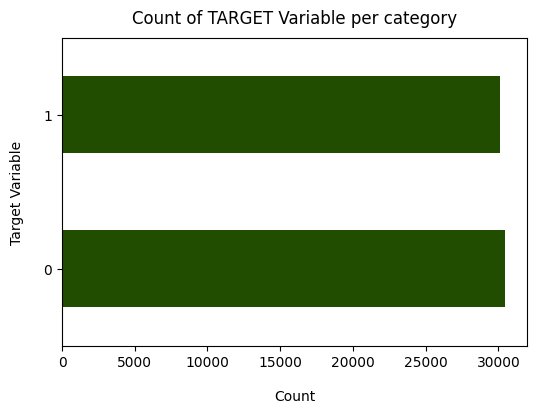

In [30]:
df['Heart_Risk'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)


In [31]:
df['Heart_Risk'].value_counts()

Heart_Risk
0    30452
1    30146
Name: count, dtype: int64

` Distribution of Heart_Risk Classes:`

| Class (Heart_Risk) | Count   |
|--------------------|---------|
| **0** (No Risk)    | **32,081** |
| **1** (At Risk)    | **31,734** |


- The class distribution is **balanced**:
  - Class 0 ≈ **50.27%**
  - Class 1 ≈ **49.73%**
 **Balanced data** helps machine learning models avoid **bias** toward the majority class, improving model performance.



In [32]:
# Checking which feature/column should be converted into Bins
for column in df.columns:
    print(f'{column} =>', df[column].value_counts().shape)

Chest_Pain => (2,)
Shortness_of_Breath => (2,)
Fatigue => (2,)
Palpitations => (2,)
Dizziness => (2,)
Swelling => (2,)
Pain_Arms_Jaw_Back => (2,)
Cold_Sweats_Nausea => (2,)
High_BP => (2,)
High_Cholesterol => (2,)
Diabetes => (2,)
Smoking => (2,)
Obesity => (2,)
Sedentary_Lifestyle => (2,)
Family_History => (2,)
Chronic_Stress => (2,)
Gender => (2,)
Age => (65,)
Heart_Risk => (2,)


- we can group the data into 5 bins.
- Binning these values will simplify the analysis and enhance the clarity of data visualization

In [33]:
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']

df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df['Age_Binned'].value_counts())


Age_Binned
56+      35294
46-55    11454
36-45     5690
26-35     5128
18-25     3032
Name: count, dtype: int64


C:\Users\MOBI LAP\AppData\Local\Temp\ipykernel_41460\2619611320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Binned', data=df, palette='viridis')


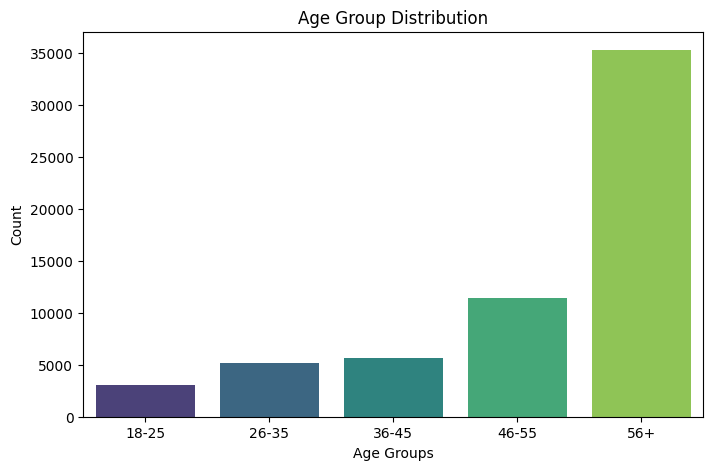

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Binned', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()



- Most of the people in the data are over 56 years old, while the 18-25 category is the lowest. This may indicate that older adults are more represented in the study on heart disease risk.

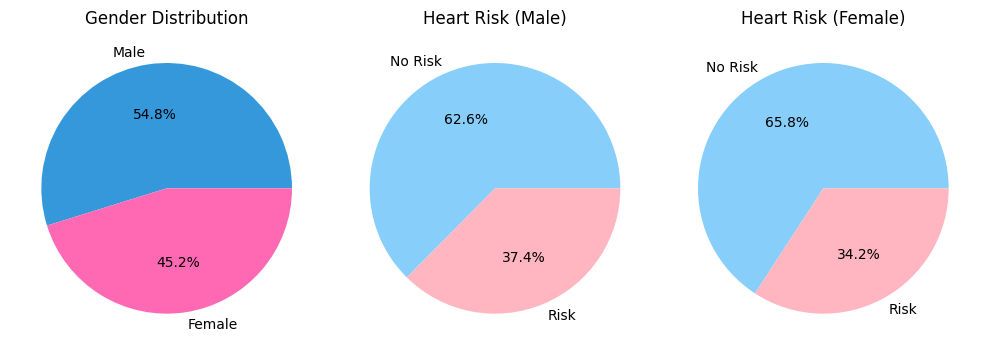

In [35]:
gender_colors = ['#3498db', '#ff69b4']      
risk_colors = ['#87CEFA', '#FFB6C1']   

gender_counts = df['Gender'].value_counts()

male_risk = df[df['Gender'] == 1]['Heart_Risk'].value_counts()
female_risk = df[df['Gender'] == 0]['Heart_Risk'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=gender_colors)
axes[0].set_title('Gender Distribution')

axes[1].pie(male_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[1].set_title('Heart Risk (Male)')

axes[2].pie(female_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[2].set_title('Heart Risk (Female)')

plt.tight_layout()
plt.show()


Males have a higher proportion both in the dataset and in heart disease risk compared to females.
Both genders show balanced representation in heart disease risk, though males are slightly more affected.

C:\Users\MOBI LAP\AppData\Local\Temp\ipykernel_41460\3030102031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)


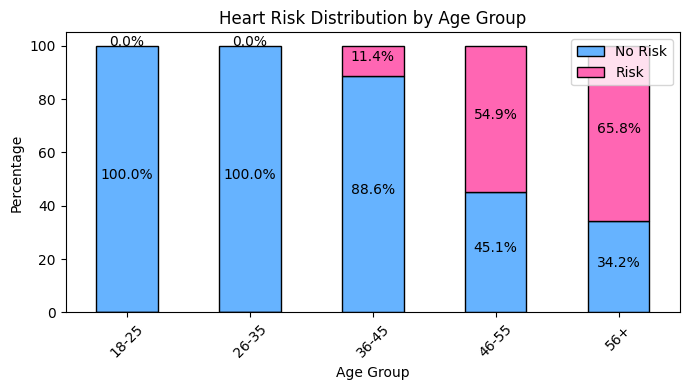

In [36]:
age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)
age_risk_percent = age_risk_counts.div(age_risk_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(7, 4))

colors = ['#66b3ff', '#ff66b3'] 
labels = ['No Risk', 'Risk']

bars = age_risk_percent.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='black')

for i, (no_risk, risk) in enumerate(zip(age_risk_percent[0], age_risk_percent[1])):
    ax.text(i, no_risk / 2, f'{no_risk:.1f}%', ha='center', color='black', fontsize=10)
    ax.text(i, no_risk + risk / 2, f'{risk:.1f}%', ha='center', color='black', fontsize=10)

ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Heart Risk Distribution by Age Group')
ax.legend(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heart disease risk increases with age, becoming a major concern from 46 years onwards.

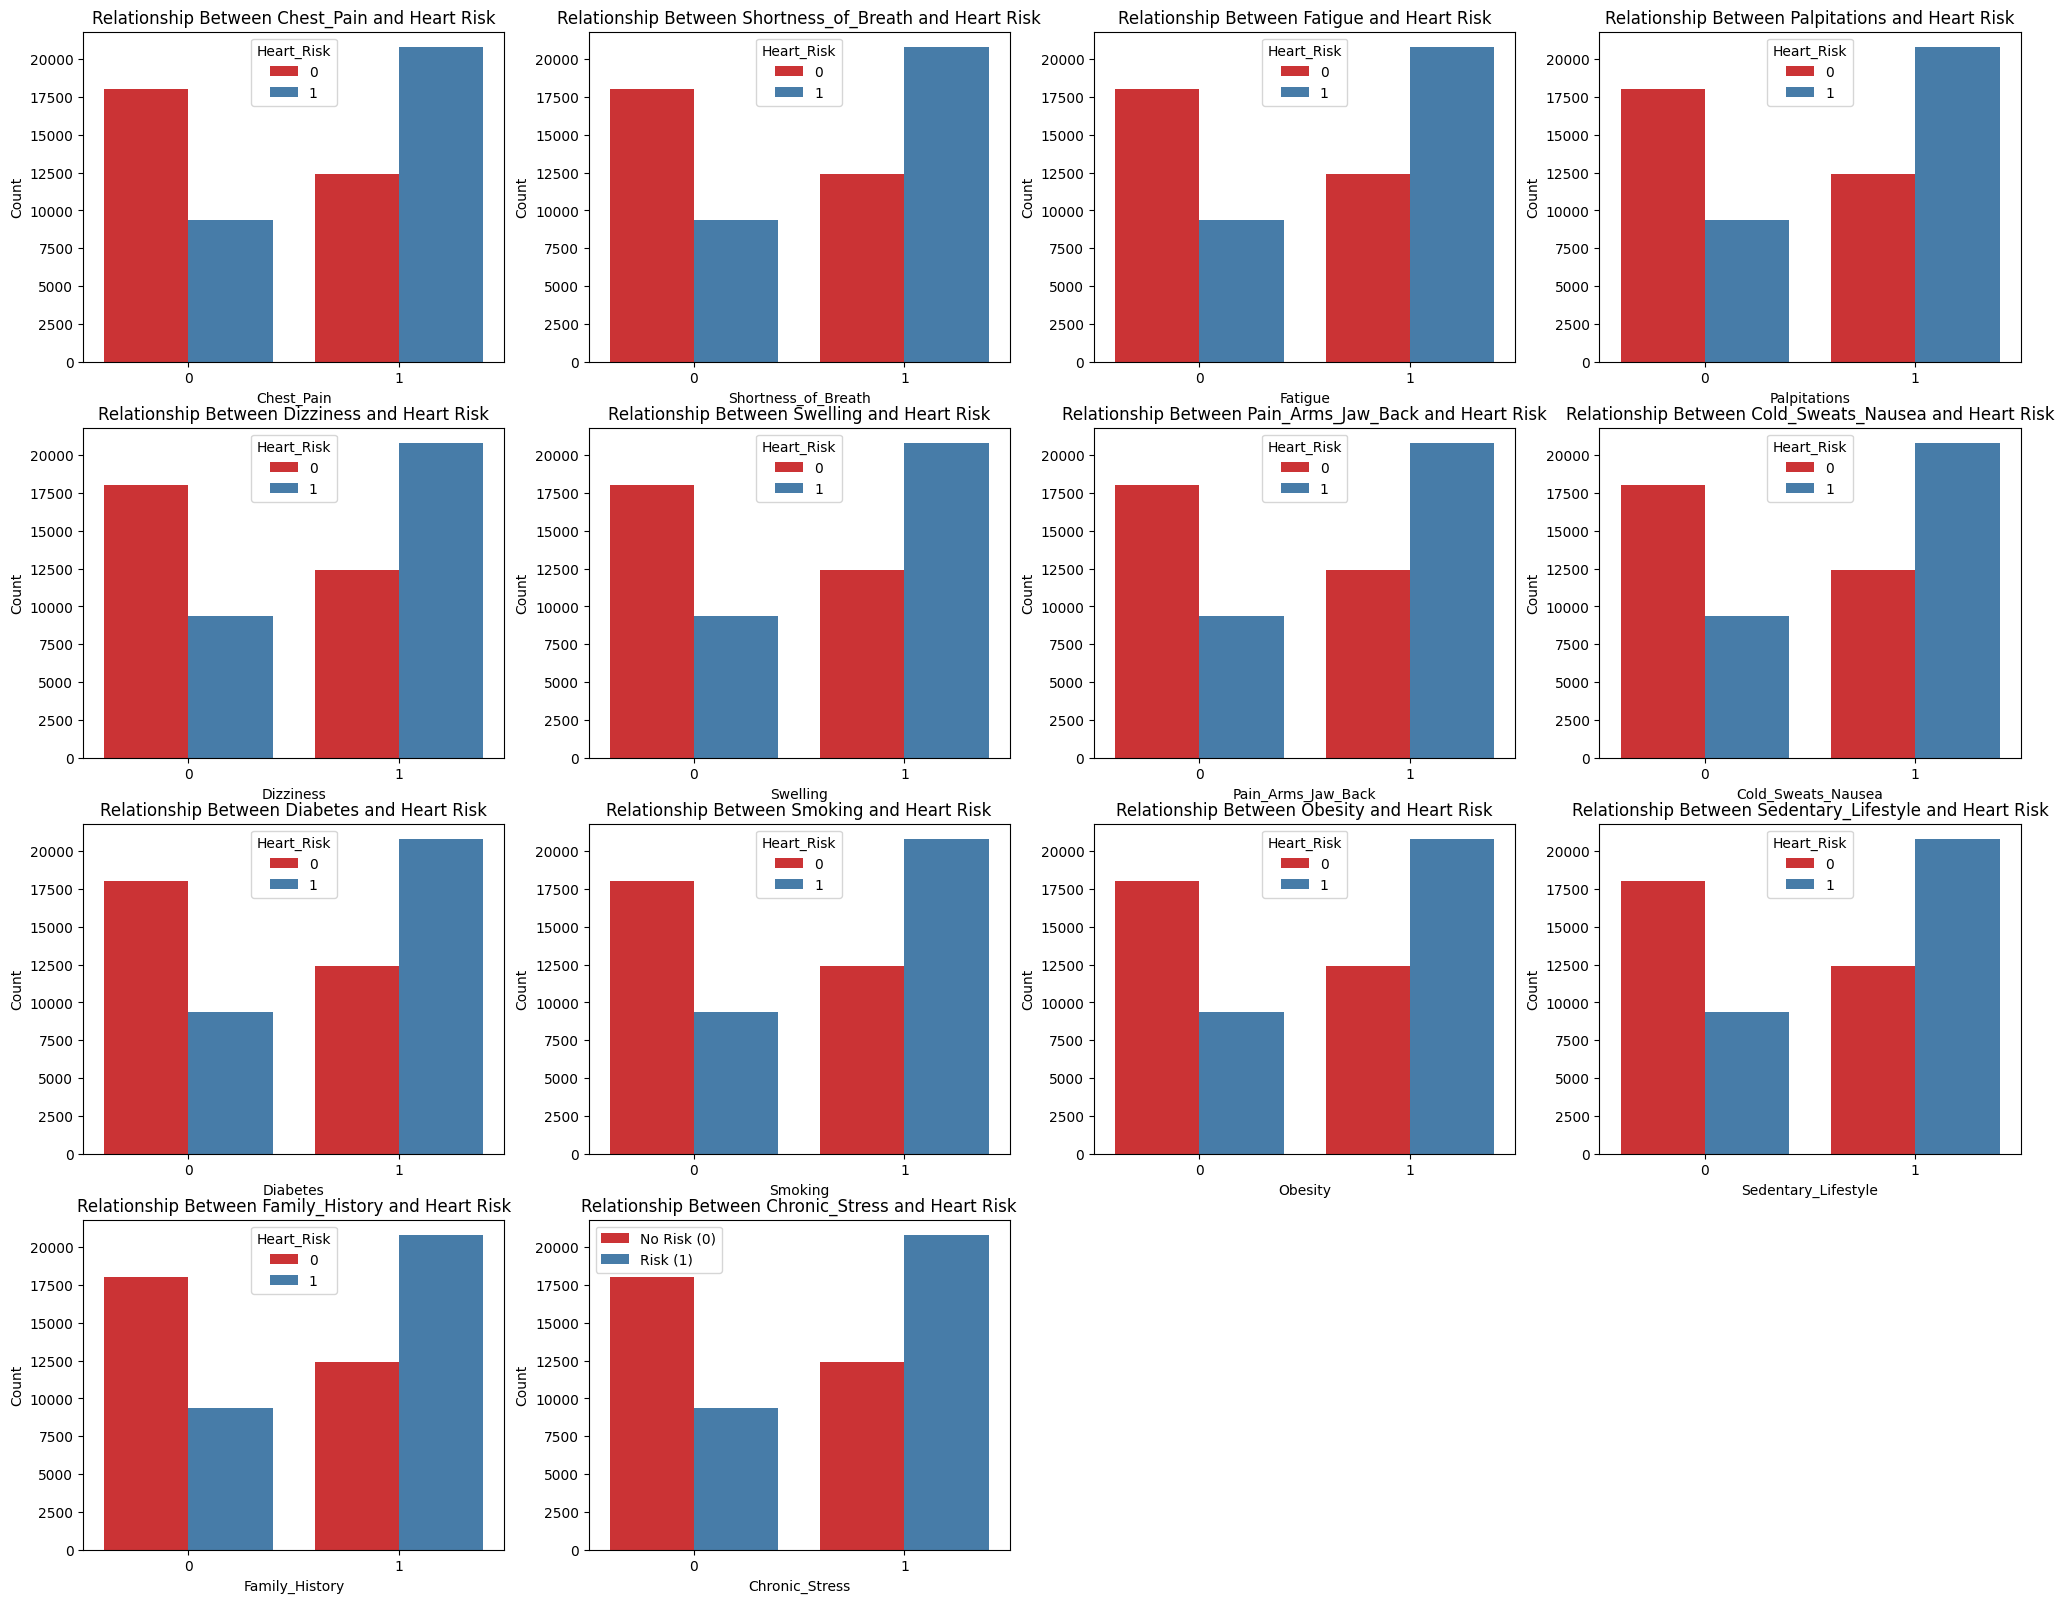

In [37]:

categorical_columns = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness',
                       'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'Diabetes', 'Smoking',
                       'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']

plt.figure(figsize=(25, 30))

for i, col in enumerate(categorical_columns, 1):

    plt.subplot(6,4, i)
    sns.countplot(x='Gender', hue='Heart_Risk', data=df, palette='Set1')
    plt.title(f'Relationship Between {col} and Heart Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.legend(['No Risk (0)', 'Risk (1)'])
plt.show()



All of these factors clearly influence the risk of heart disease, with the following columns showing a significant association with increased risk:

- Smoking, obesity, diabetes, family history, and sedentary lifestyle
- Symptoms such as chest pain, shortness of breath, and heart palpitations

In [38]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk', 'Age_Binned'],
      dtype='object')


In [39]:
df = df.drop('Age_Binned', axis=1, errors='ignore')


In [43]:
import plotly.express as px

corr = df.corr()['Heart_Risk'].drop('Heart_Risk').sort_values(ascending=False)
fig = px.bar(corr, x=corr.values, y=corr.index,
             title="Feature Correlation with Heart Risk",
             orientation='h')
fig.show()

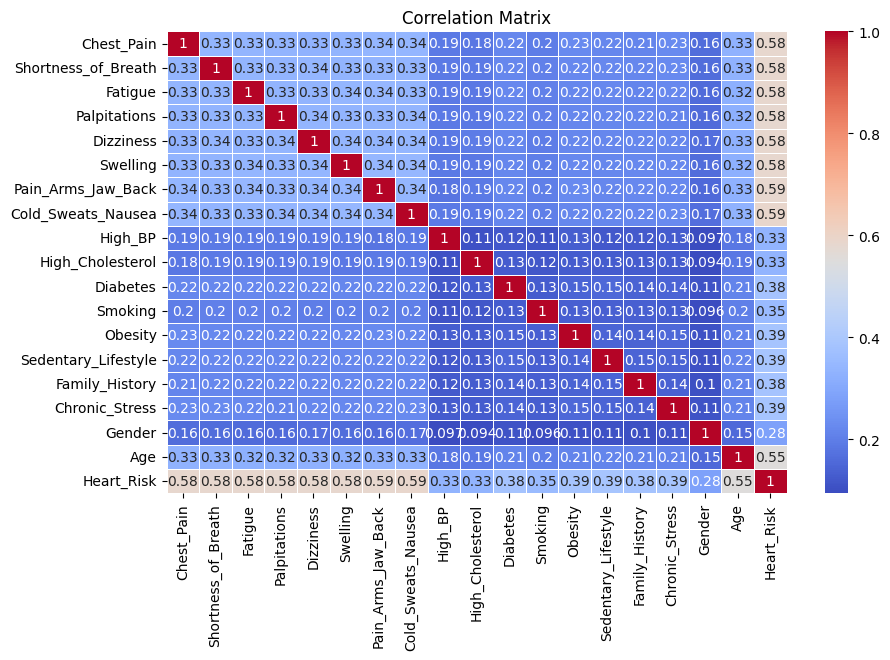

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


- Physical symptoms (such as cold sweats, nausea, chest pain, shortness of breath) are the strongest indicators of heart disease risk.
- Age, sedentary lifestyle and obesity are important, but their impact is less compared to direct symptoms.
- Chronic diseases such as diabetes, hypertension and family history have a moderate impact.
- Smoking is a risk factor but less important than other factors in this group.